<a href="https://colab.research.google.com/github/Joao-Tolentino/lia1_2024_1/blob/main/Entregas-Joao-Tolentino/Modelo_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Carrega o dataset CIFAR100 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar100.load_data()


169001437/169001437 [==============================] - 2s 0us/step


In [4]:
# Função para exibir as imagens

def visualiza_imagens(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


<ipython-input-4-a1c7f428e62c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


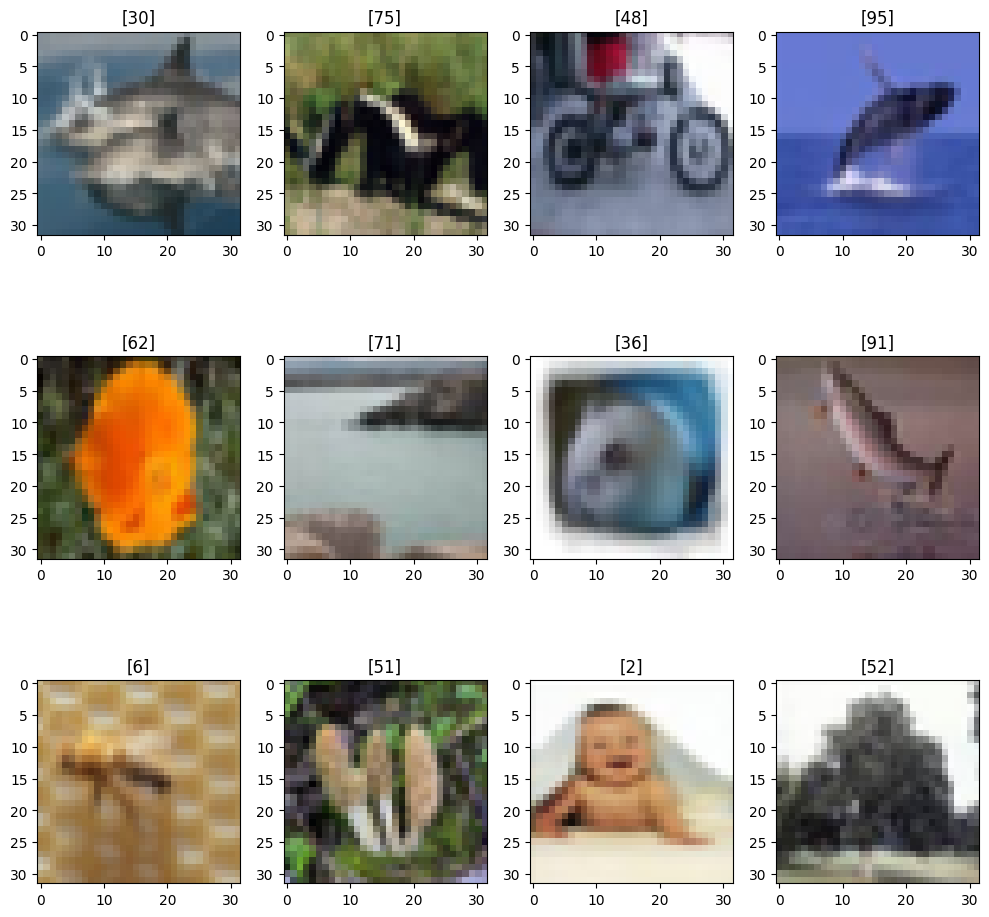

In [8]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

In [9]:
labels_treino = tf.one_hot(labels_treino,
                     depth=labels_treino.max() + 1,
                     dtype=tf.float64)
labels_teste = tf.one_hot(labels_teste,
                   depth=labels_teste.max() + 1,
                   dtype=tf.float64)

labels_treino = tf.squeeze(labels_treino)
labels_teste = tf.squeeze(labels_teste)

In [10]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),

    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),

    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC', 'accuracy']
)

In [15]:
hist = model.fit(imagens_treino, labels_treino,
                 epochs=2,
                 batch_size=64,
                 verbose=1,
                 validation_data=(imagens_teste, labels_teste))

Epoch 1/2
782/782 [==============================] - 495s 634ms/step - loss: 2.2631 - auc: 0.9410 - accuracy: 0.4060 - val_loss: 2.3728 - val_auc: 0.9298 - val_accuracy: 0.3880
Epoch 2/2
782/782 [==============================] - 485s 621ms/step - loss: 1.9308 - auc: 0.9569 - accuracy: 0.4771 - val_loss: 2.3698 - val_auc: 0.9231 - val_accuracy: 0.4045


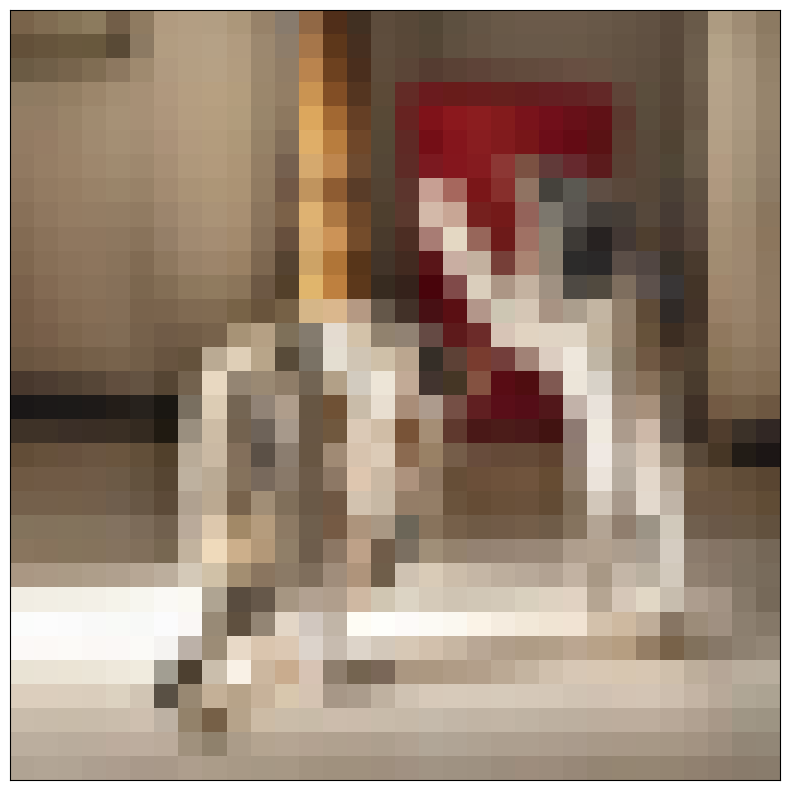

In [17]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/drive/MyDrive/Colab Notebooks/images/Gatito.jpeg")

# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

# Exibir a imagem
plt.figure(figsize = (10,10))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [18]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

# Fazendo a previsão!
previsoes = model.predict(nova_imagem_array)

1/1 [==============================] - 0s 301ms/step


In [19]:
print(previsoes)

[[1.0979908e-05 2.8454914e-04 1.3136236e-06 4.8692930e-03 2.1409774e-01
  5.9969193e-06 9.3209092e-06 9.1485315e-05 3.7299108e-04 2.0611619e-04
  3.2110463e-04 9.2992177e-06 1.2343047e-04 5.2645611e-08 1.5796839e-05
  4.7423862e-05 2.4149014e-05 1.8674191e-07 4.1728743e-04 2.3234150e-04
  2.0832509e-05 8.7145893e-03 5.6735362e-04 1.0612351e-03 1.9047595e-05
  3.7999796e-03 1.2831697e-03 4.3601776e-03 9.1136171e-04 7.2397459e-03
  2.3652961e-04 2.5774210e-03 5.7306618e-04 4.0177396e-01 2.1039956e-05
  4.4031691e-07 8.5720640e-06 1.0201205e-06 3.0138995e-04 5.1403820e-04
  8.5107145e-05 8.3479608e-06 6.4269542e-03 8.1675780e-06 3.0300312e-04
  3.4977306e-02 5.5391603e-04 3.1417115e-03 1.2298110e-05 1.3375527e-04
  9.7919358e-03 2.1754591e-05 6.1516272e-04 3.1855697e-07 1.5037811e-07
  2.7570080e-02 4.9674287e-05 2.7822132e-05 1.1568616e-05 1.0160712e-02
  1.4673304e-05 2.3792502e-06 4.1116755e-07 3.2288678e-02 4.0063564e-02
  9.7872522e-03 8.5303059e-04 1.4934534e-02 7.8535741e-06 2.1737